In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

In [3]:
# Set the working directory
os.chdir(r'C:\Users\Guillaume\Desktop\Ironhack_189\Final_Project')

# Load the data
file_path = r'Dataset\API\reddit_comments.csv'
reddit_data = pd.read_csv(file_path)
reddit_data

,username,comment,date,score
0,AutoModerator,--- \n>✨⭐ **Don't miss [our 50-million-su...,2023-11-09 07:21:52,1
1,clickbaitnsfw,He sounded like a kid on Christmas day when he...,2023-11-09 08:06:53,6330
2,isuphysics,Nintendo Sixty-FOOOOOOOOOOUR,2023-11-09 11:03:34,1563
3,ultimate_stuntman,OHH MY GAAAAAAWD,2023-11-09 11:16:41,382
4,chop5397,[THANK YOU SANTA!!!](https://youtu.be/BKEL4cUT...,2023-11-09 13:27:23,167
...,...,...,...,...
2214,Techmite,"Sorry to say for all you cop haters out there,...",2023-11-10 06:53:36,1
2215,New-Construction-103,Asshole cop,2023-11-10 09:12:05,1
2216,Dogcatman9,No. The cop car should have just merged and th...,2023-11-10 09:15:24,1
2217,Healthy-Blueberry-90,Loves it,2023-11-10 09:33:13,1


In [4]:
# Check for Missing Values
reddit_data.isnull().sum()

username    0
comment     0
date        0
score       0
dtype: int64

In [5]:
reddit_data.duplicated().sum()

0

In [6]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  2219 non-null   object
 1   comment   2219 non-null   object
 2   date      2219 non-null   object
 3   score     2219 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 69.5+ KB


In [7]:
# Convert 'date' column to datetime format
reddit_data['date'] = pd.to_datetime(reddit_data['date'], errors='coerce')
reddit_data['date']

0      2023-11-09 07:21:52
1      2023-11-09 08:06:53
2      2023-11-09 11:03:34
3      2023-11-09 11:16:41
4      2023-11-09 13:27:23
               ...        
2214   2023-11-10 06:53:36
2215   2023-11-10 09:12:05
2216   2023-11-10 09:15:24
2217   2023-11-10 09:33:13
2218   2023-11-10 09:39:07
Name: date, Length: 2219, dtype: datetime64[ns]

In [8]:
reddit_data['score'].describe()

count    2219.000000
mean       14.747183
std       193.704623
min      -317.000000
25%         0.000000
50%         1.000000
75%         3.000000
max      6330.000000
Name: score, dtype: float64

In [9]:
# Grouping the data by date to count the number of comments per day
comments_over_time = reddit_data.groupby(reddit_data['date'].dt.date).size()
comments_over_time

date
2023-11-09    2077
2023-11-10     142
dtype: int64

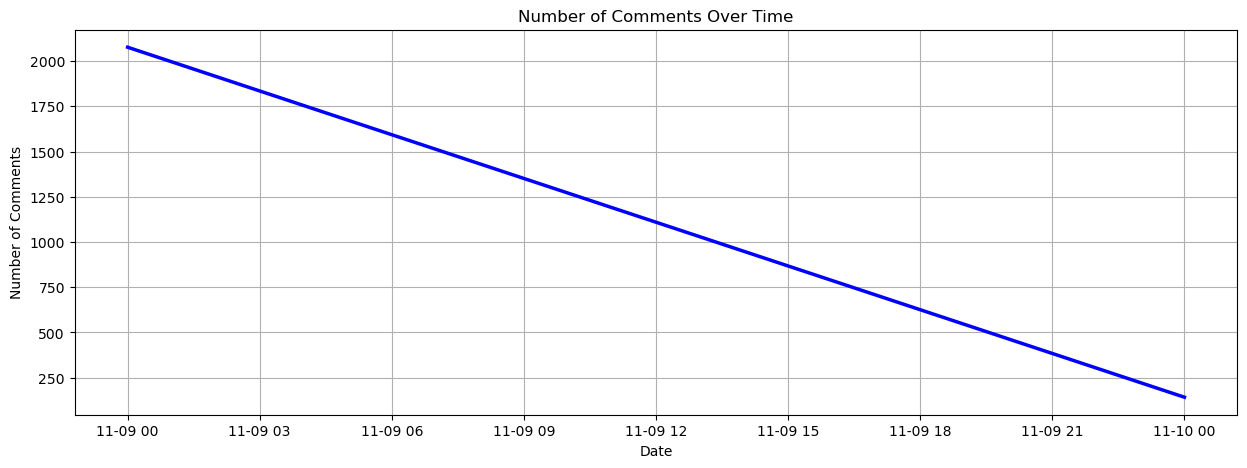

In [10]:
# Plotting the number of comments over time
plt.figure(figsize=(15, 5))
comments_over_time.plot(kind='line', linewidth=2.5, color='blue')
plt.title('Number of Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.show()

In [11]:
# Comment Length Analysis: Create a new column for comment length
reddit_data['comment_length'] = reddit_data['comment'].apply(len)

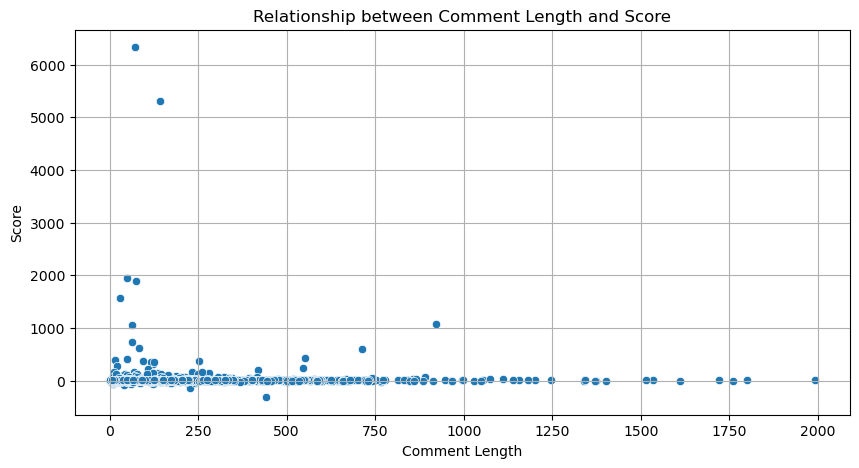

In [12]:
# Relationship between Comment Length and Score
plt.figure(figsize=(10, 5))
sns.scatterplot(x=reddit_data['comment_length'], y=reddit_data['score'])
plt.title('Relationship between Comment Length and Score')
plt.xlabel('Comment Length')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [13]:
# Most Active Users by Comment Count
active_users = reddit_data['username'].value_counts().head(10)
active_users

Global_Lock_2049        58
BonnieMcMurray          37
[deleted]               35
LickMyThralls           20
tratata1973             15
ExqueeriencedLesbian    15
Seahearn4               15
Kicken                  14
Sofa_King_Gorgeous      11
afrothunder1987         11
Name: username, dtype: int64

In [14]:
# Calculate the total score for each user and sort them to find the top ten users with the highest total score
top_users_by_score = reddit_data.groupby('username')['score'].sum().sort_values(ascending=False).head(10)
top_users_by_score

username
clickbaitnsfw           6330
cleaninglady18          5301
Butterbubblebutt        1950
youngboylongstick       1802
isuphysics              1563
MorrowPlotting          1090
Global_Lock_2049        1075
DILLIGAF73              1057
Kicken                   861
Dependent_Trouble249     741
Name: score, dtype: int64

In [15]:
# Calculate the total score and total number of comments for each user
user_stats = reddit_data.groupby('username').agg(
    total_score=pd.NamedAgg(column='score', aggfunc='sum'),
    comment_count=pd.NamedAgg(column='comment', aggfunc='count')
).reset_index()

# Check the correlation between total score and number of comments for each user
correlation = user_stats[['total_score', 'comment_count']].corr()
correlation

,total_score,comment_count
total_score,1.000000,0.073465
comment_count,0.073465,1.000000


In [16]:
deleted_comments = reddit_data[reddit_data['username'] == '[deleted]']['comment']

# Overview of the deleted comment
text_deleted = " ".join(comment for comment in deleted_comments)
text_deleted

'[deleted] [deleted] [removed] [deleted] [removed] [removed] [removed] [removed] [removed] [removed] [removed] [removed] [removed] [removed] [removed] [deleted] [removed] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted] [deleted]'

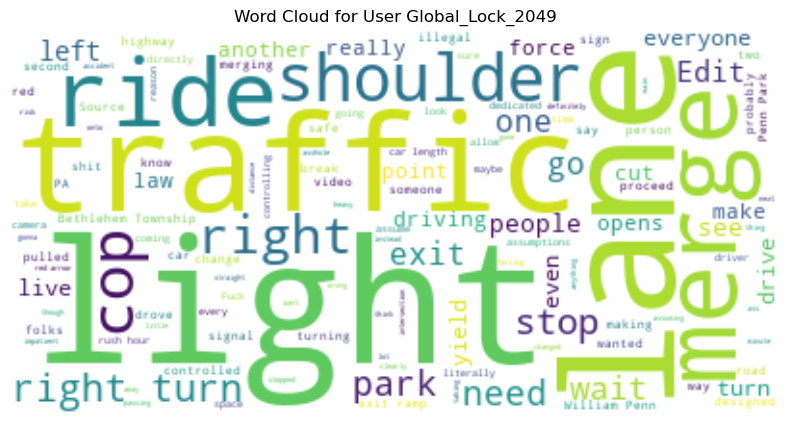

In [17]:
# Filter comments by the user 'Global_Lock_2049'
global_lock_comments = reddit_data[reddit_data['username'] == 'Global_Lock_2049']['comment']

# Generate the word cloud for the user 'Global_Lock_2049'
text_global_lock = " ".join(comment for comment in global_lock_comments)
wordcloud_global_lock = WordCloud(background_color='white').generate(text_global_lock)

# Display the generated image for 'Global_Lock_2049' user comments:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_global_lock, interpolation='bilinear')
plt.title('Word Cloud for User Global_Lock_2049')
plt.axis('off')  # turn off axis
plt.show()

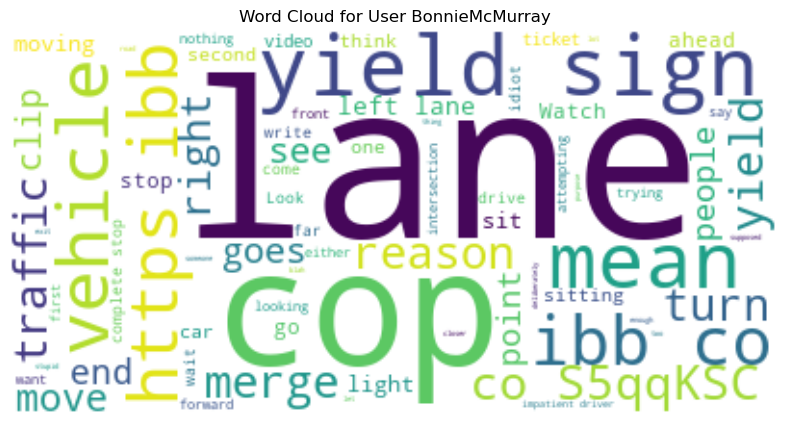

In [18]:
# Filter comments by the user 'BonnieMcMurray'
global_lock_comments = reddit_data[reddit_data['username'] == 'BonnieMcMurray']['comment']

# Generate the word cloud for the user 'Global_Lock_2049'
text_global_lock = " ".join(comment for comment in global_lock_comments)
wordcloud_global_lock = WordCloud(background_color='white').generate(text_global_lock)

# Display the generated image for 'Global_Lock_2049' user comments:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_global_lock, interpolation='bilinear')
plt.title('Word Cloud for User BonnieMcMurray')
plt.axis('off')  # turn off axis
plt.show()

In [19]:
# Retrieve the specific comment with the score of 6330 for the user 'clickbaitnsfw'
clickbaitnsfw_high_score_comment = reddit_data[(reddit_data['username'] == 'clickbaitnsfw') & 
                                               (reddit_data['score'] == 6330)]['comment'].iloc[0]

# Retrieve the specific comment with the score of 5301 for the user 'cleaninglady18'
cleaninglady18_high_score_comment = reddit_data[(reddit_data['username'] == 'cleaninglady18') & 
                                                (reddit_data['score'] == 5301)]['comment'].iloc[0]

print("the clickbaitnsfw comment is: ", clickbaitnsfw_high_score_comment) 
print()
print("the cleaninglady18 comment is: ", cleaninglady18_high_score_comment)

the clickbaitnsfw comment is:  He sounded like a kid on Christmas day when he caught that on his dashcam

the cleaninglady18 comment is:  Cop definitely tested the waters too and just waited it out to see if the guy beeping is gonna do what they think he's gonna do, and he did 😂


In [20]:
# Rename the 'score' column to 'like'
reddit_data.rename(columns={'score': 'like'}, inplace=True)
reddit_data

,username,comment,date,like,comment_length
0,AutoModerator,--- \n>✨⭐ **Don't miss [our 50-million-su...,2023-11-09 07:21:52,1,726
1,clickbaitnsfw,He sounded like a kid on Christmas day when he...,2023-11-09 08:06:53,6330,73
2,isuphysics,Nintendo Sixty-FOOOOOOOOOOUR,2023-11-09 11:03:34,1563,28
3,ultimate_stuntman,OHH MY GAAAAAAWD,2023-11-09 11:16:41,382,16
4,chop5397,[THANK YOU SANTA!!!](https://youtu.be/BKEL4cUT...,2023-11-09 13:27:23,167,70
...,...,...,...,...,...
2214,Techmite,"Sorry to say for all you cop haters out there,...",2023-11-10 06:53:36,1,402
2215,New-Construction-103,Asshole cop,2023-11-10 09:12:05,1,11
2216,Dogcatman9,No. The cop car should have just merged and th...,2023-11-10 09:15:24,1,125
2217,Healthy-Blueberry-90,Loves it,2023-11-10 09:33:13,1,8


In [26]:
from sqlalchemy import create_engine 
import pymysql.cursors
import os

In [25]:
pw = os.getenv('MySQL_password')
connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/'
engine = create_engine(connection_string)
reddit_data.to_sql('reddit_comment',engine, 'comment_toxicity', if_exists='replace', index=False)

2219

In [21]:
reddit_data['comment'] = reddit_data['comment'].str.replace('[^\w\s]', '', regex=True)

In [22]:
# Save the cleaned and renamed DataFrame to a CSV file
output_file_path = r'C:\Users\Guillaume\Desktop\Ironhack_189\Final_Project\Data Cleaning\Reddit\cleaned_reddit_comments.csv'

# Save the cleaned and renamed DataFrame to a CSV file
reddit_data.to_csv(output_file_path, index=False, encoding='utf-8')

In [23]:
reddit_data

,username,comment,date,like,comment_length
0,AutoModerator,\n Dont miss our 50millionsubscribermark...,2023-11-09 07:21:52,1,726
1,clickbaitnsfw,He sounded like a kid on Christmas day when he...,2023-11-09 08:06:53,6330,73
2,isuphysics,Nintendo SixtyFOOOOOOOOOOUR,2023-11-09 11:03:34,1563,28
3,ultimate_stuntman,OHH MY GAAAAAAWD,2023-11-09 11:16:41,382,16
4,chop5397,THANK YOU SANTAhttpsyoutubeBKEL4cUTOI4sicheIAY...,2023-11-09 13:27:23,167,70
...,...,...,...,...,...
2214,Techmite,Sorry to say for all you cop haters out there ...,2023-11-10 06:53:36,1,402
2215,New-Construction-103,Asshole cop,2023-11-10 09:12:05,1,11
2216,Dogcatman9,No The cop car should have just merged and the...,2023-11-10 09:15:24,1,125
2217,Healthy-Blueberry-90,Loves it,2023-11-10 09:33:13,1,8
